# Pre-trained sophisticated model
Needs a good model architecture and quality of training
## When to use transfer learning
* Not enough labelled data
* Effective pre-trained model already exists

## We'll use two models
* AlexNet :  convolutional layer followed by 3 fc layer 
* VCC16


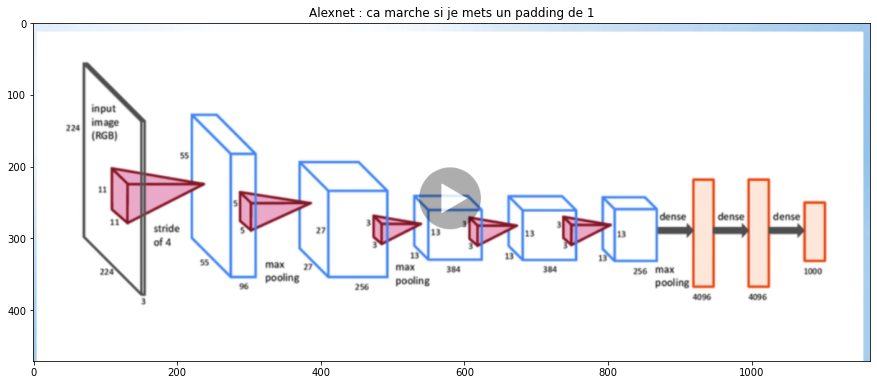

In [1]:
import PIL
import torch
import torch.nn as nn
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
img = Image.open("data/transfer/alexnet.png")
plt.figure(figsize=(15,15))

plt.title("Alexnet : ca marche si je mets un padding de 1")
plt.imshow(img)

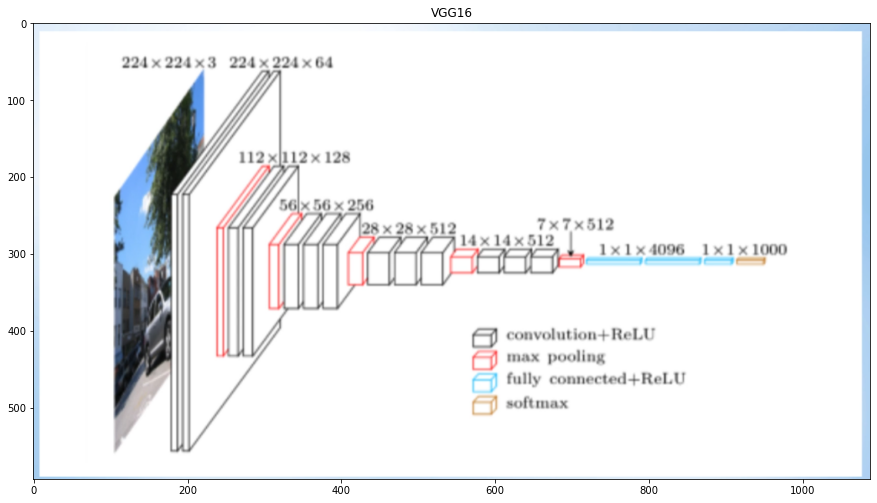

In [2]:
img = Image.open("data/transfer/vgg16.png")
plt.figure(figsize=(15,15))

plt.title("VGG16")
plt.imshow(img)

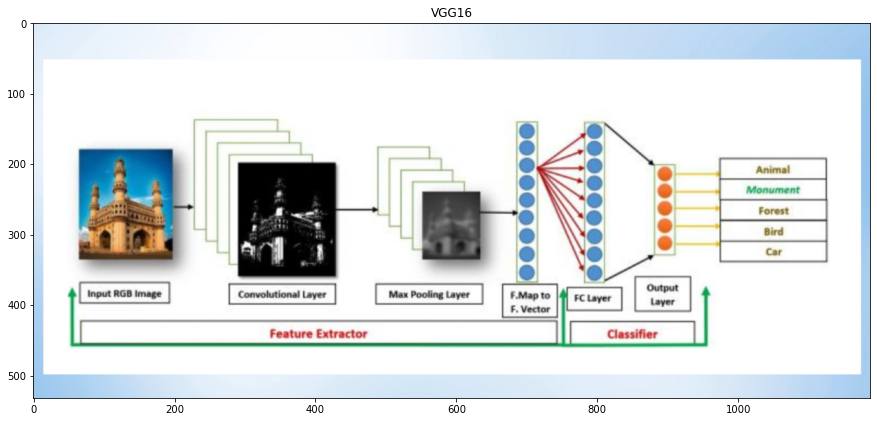

In [3]:
img = Image.open("data/transfer/cnn_use.png")
plt.figure(figsize=(15,15))

plt.title("VGG16")
plt.imshow(img)

* The cnn takes a long time to train and is already trained to achieve very good feature extractions. So we'll freeze the parameters of the feature extractor part and only train the classifier part on new data (we want to differentiate bees from ants)
* as we only need two nodes at the end, we'll add a final node at the end containing two nodes

# What transfer learning to use ?

Transfer Learning

Transfer learning involves taking a pre-trained neural network and adapting the neural network to a new, different data set.

Depending on both:

    The size of the new data set, and
    The similarity of the new data set to the original data set

The approach for using transfer learning will be different. There are four main cases:

    New data set is small, new data is similar to original training data.
    New data set is small, new data is different from original training data.
    New data set is large, new data is similar to original training data.
    New data set is large, new data is different from original training data.

A large data set might have one million images. A small data could have two-thousand images. The dividing line between a large data set and small data set is somewhat subjective. Overfitting is a concern when using transfer learning with a small data set.

Images of dogs and images of wolves would be considered similar; the images would share common characteristics. A data set of flower images would be different from a data set of dog images.

Each of the four transfer learning cases has its own approach. In the following sections, we will look at each case one by one.

The graph below displays what approach is recommended for each of the four main cases.

Four cases for using transfer learning.
Demonstration Network

To explain how each situation works, we will start with a generic pre-trained convolutional neural network and explain how to adjust the network for each case. Our example network contains three convolutional layers and three fully connected layers:

Overview of the layers of a pre-trained CNN.

Here is an generalized overview of what the convolutional neural network does:

    the first layer will detect edges in the image
    the second layer will detect shapes
    the third convolutional layer detects higher level features

Each transfer learning case will use the pre-trained convolutional neural network in a different way.
Case 1: Small Data Set, Similar Data

Case 1: small set, similar data

If the new data set is small and similar to the original training data:

    slice off the end of the neural network
    add a new fully connected layer that matches the number of classes in the new data set
    randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
    train the network to update the weights of the new fully connected layer

To avoid overfitting on the small data set, the weights of the original network will be held constant rather than re-training the weights.

Since the data sets are similar, images from each data set will have similar higher level features. Therefore most or all of the pre-trained neural network layers already contain relevant information about the new data set and should be kept.

Here's how to visualize this approach:

Adding and training a fully-connected layer at the end of the NN.
Case 2: Small Data Set, Different Data

Case 2: small set, different data

If the new data set is small and different from the original training data:

    slice off all but some of the pre-trained layers near the beginning of the network
    add to the remaining pre-trained layers a new fully connected layer that matches the number of classes in the new data set
    randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
    train the network to update the weights of the new fully connected layer

Because the data set is small, overfitting is still a concern. To combat overfitting, the weights of the original neural network will be held constant, like in the first case.

But the original training set and the new data set do not share higher level features. In this case, the new network will only use the layers containing lower level features.

Here is how to visualize this approach:

Remove all but the starting layers of the model, and add and train a linear layer at the end.
Case 3: Large Data Set, Similar Data

Case 3: large data, similar to ImageNet or pre-trained set.

If the new data set is large and similar to the original training data:

    remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
    randomly initialize the weights in the new fully connected layer
    initialize the rest of the weights using the pre-trained weights
    re-train the entire neural network

Overfitting is not as much of a concern when training on a large data set; therefore, you can re-train all of the weights.

Because the original training set and the new data set share higher level features, the entire neural network is used as well.

Here is how to visualize this approach:

Utilizing pre-trained weights as a starting point!
Case 4: Large Data Set, Different Data

Case 4: large data, different than original set

If the new data set is large and different from the original training data:

    remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
    retrain the network from scratch with randomly initialized weights
    alternatively, you could just use the same strategy as the "large and similar" data case

Even though the data set is different from the training data, initializing the weights from the pre-trained network might make training faster. So this case is exactly the same as the case with a large, similar data set.

If using the pre-trained network as a starting point does not produce a successful model, another option is to randomly initialize the convolutional neural network weights and train the network from scratch.

Here is how to visualize this approach:

Fine-tune or retrain entire network.
Optional Resources

    Check out this research paper that systematically analyzes the transferability of features learned in pre-trained CNNs.
    Read the Nature publication detailing Sebastian Thrun's cancer-detecting CNN!



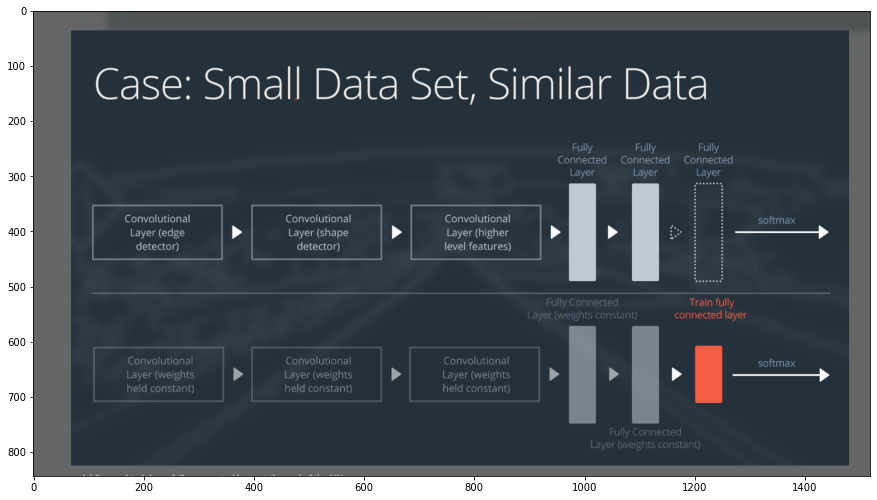

In [7]:
img = Image.open("data/transfer/transfer_simsmall.png")
plt.figure(figsize=(15,15))
plt.imshow(img)

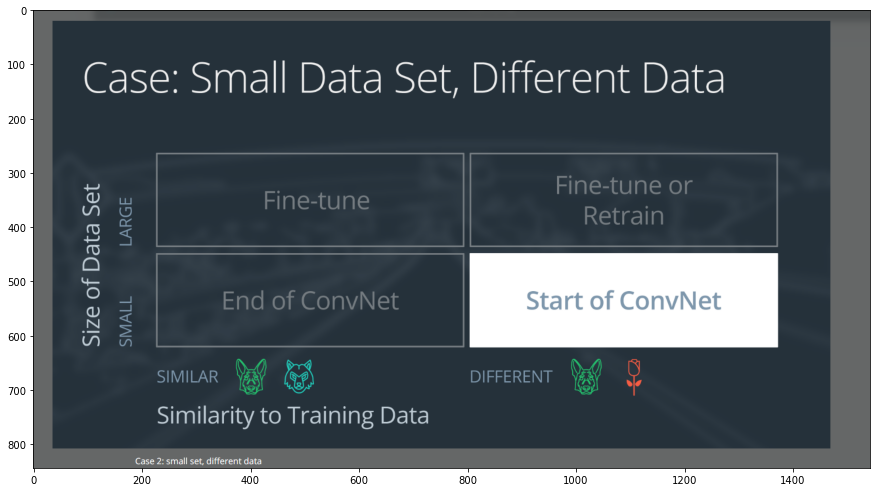

In [8]:
img = Image.open("data/transfer/transfer_diffsmall.png")
plt.figure(figsize=(15,15))
plt.imshow(img)

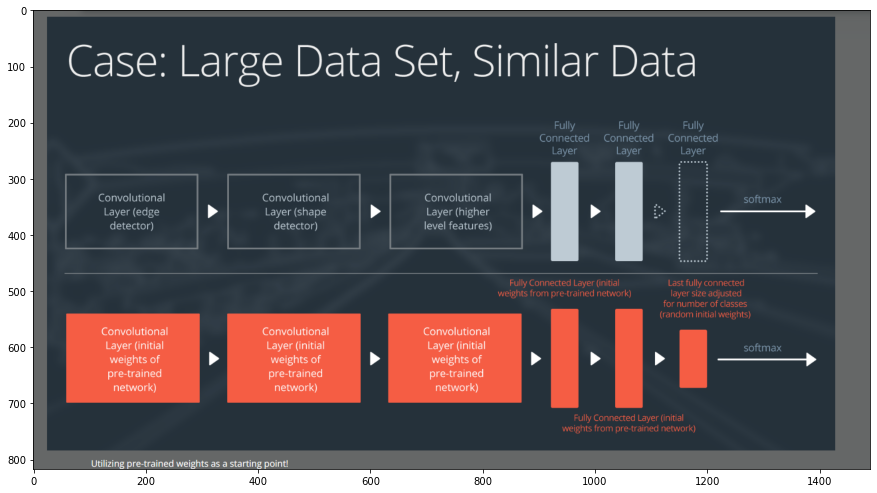

In [9]:
img = Image.open("data/transfer/transfer_simlarge.png")
plt.figure(figsize=(15,15))
plt.imshow(img)

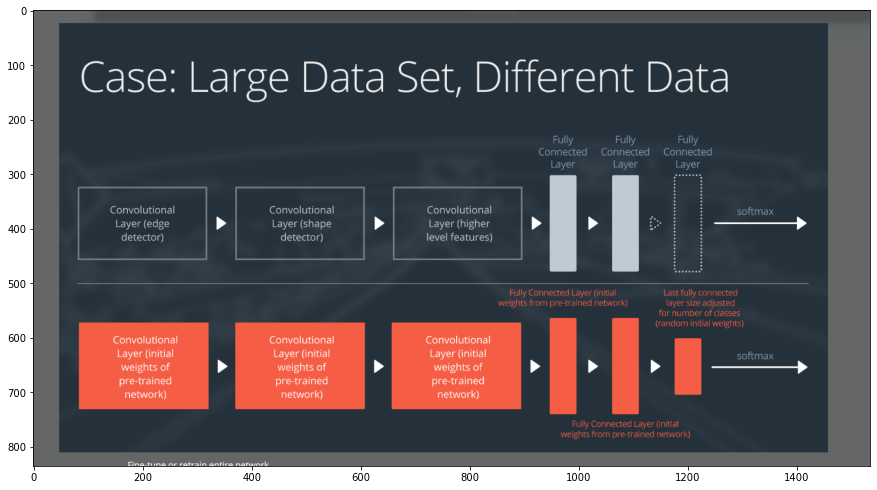

In [11]:
img = Image.open("data/transfer/transfer_difflarge.png")
plt.figure(figsize=(15,15))
plt.imshow(img)